# Data Exploration

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

Reading The Data....

In [2]:
data = pd.read_csv('C://Users//SANDEEP YADAV//Desktop//Major2Poject//employee_data.csv', delimiter=',')

In [3]:
print(data.shape)

(14999, 12)


Finding Missing Values:

In [4]:
data.apply(lambda x: sum(x.isnull()))

name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64

In [5]:
data.head()

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1


One thing can be infered from above that salary and salary_level represents the same thing beacuse :

* low=1
* medium=2
* high=3

In [6]:
data.describe()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


From this the following things can be analysed :

1.The avg satisfaction_level is > 0.6 - this clearly states that it is a not a major factor and along with it there are other factors too which are affecting the employees i.e last_evaluation whose avg > 0.7.

2.The employee is having of nearly 2 years of experience in the company and gets avg salary.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
name                      14998 non-null object
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_projects           14999 non-null int64
average_monthly_hours     14999 non-null int64
time_spent_company        14999 non-null int64
work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5_years    14999 non-null int64
department                14999 non-null object
salary                    14999 non-null object
salary_level              14999 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 1.4+ MB


In [8]:
print(data[data['name']==""].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
name                      0 non-null object
satisfaction_level        0 non-null float64
last_evaluation           0 non-null float64
number_projects           0 non-null int64
average_monthly_hours     0 non-null int64
time_spent_company        0 non-null int64
work_accident             0 non-null int64
left                      0 non-null int64
promotion_last_5_years    0 non-null int64
department                0 non-null object
salary                    0 non-null object
salary_level              0 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 0.0+ bytes
None


Finding and filtering categorical variables:

In [9]:
categorical = data.dtypes[data.dtypes=="object"].index

print(categorical)

Index(['name', 'department', 'salary'], dtype='object')


Looking at the number of unique values in each of them:

In [10]:
data[categorical].apply(lambda x: len(x.unique()))

name          14999
department       10
salary            3
dtype: int64

* This tells us that allthe data is unique.
* There are 10 departments.
* And the salary types is = 3.

In [11]:
data[categorical].describe()

,name,department,salary
count,14998,14999,14999
unique,14998,10,3
top,ROLEN,sales,low
freq,1,4140,7316


In [12]:
#Excluding Name:

categorical_columns = [x for x in categorical if x not in ['name']]

#Printing Frequency of categories:

for col in categorical_columns:
    print('\nFrequency of Categories for variable :',col)
    print(data[col].value_counts())


Frequency of Categories for variable : department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

Frequency of Categories for variable : salary
low       7316
medium    6446
high      1237
Name: salary, dtype: int64


The output gives us following observations:

1.department: We can go for two broad categories of department i.e Technical And Non-Technical.

2.salary: Mojority employees lies in the category of low and med salary type.

But we should check if that’s a good idea before doing it.

# Data Cleaning

Imputing Missing Values : Since there is no missing values so no such requirement is there....

In [13]:
data.apply(lambda x: sum(x.isnull()))

name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64

Applying One Hot Encoding on salary and salary_level.

In [14]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['salary','department'])

In [15]:
data.dtypes

name                       object
satisfaction_level        float64
last_evaluation           float64
number_projects             int64
average_monthly_hours       int64
time_spent_company          int64
work_accident               int64
left                        int64
promotion_last_5_years      int64
salary_level                int64
salary_high                 uint8
salary_low                  uint8
salary_medium               uint8
department_IT               uint8
department_RandD            uint8
department_accounting       uint8
department_hr               uint8
department_management       uint8
department_marketing        uint8
department_product_mng      uint8
department_sales            uint8
department_support          uint8
department_technical        uint8
dtype: object

In [16]:
data.head()

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,SMITH,0.38,0.53,2,157,3,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
3,BROWN,0.72,0.87,5,223,5,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,JONES,0.37,0.52,2,159,3,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [17]:
data[['department_IT','department_RandD','department_accounting','department_hr','department_management','department_marketing','department_product_mng','department_sales','department_support','department_technical']].head(10)

,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0


In [18]:
data[['salary_low','salary_medium','salary_high']].head(10)

,salary_low,salary_medium,salary_high
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,1,0,0


Exporting Data...

In [19]:
#Drop the columns which have been converted to different types:
data.head()
#data.drop(['salary_level','name','department'],axis=1,inplace=True)

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,SMITH,0.38,0.53,2,157,3,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,2,...,0,0,0,0,0,0,0,1,0,0
3,BROWN,0.72,0.87,5,223,5,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,JONES,0.37,0.52,2,159,3,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
data.drop('name',axis=1,inplace=True)

In [21]:
data.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_high,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


So let’s define who are the best and most experienced employees..
                (above average)

* Last Evaluation >= 0.74
* time_spend_company >= 4
* number_project > 4
* About 1944 people 

In [22]:
good_employee_data = data.loc[data['last_evaluation'] >= 0.74].loc[data['time_spent_company'] >= 4].loc[data['number_projects'] > 4]
good_employee_data.shape

(1944, 22)

Make A File For Good People.....

In [23]:
#good_employee_data.to_csv('C://Users//SANDEEP YADAV//Desktop//Major2Poject//good_employee_data.csv')
#print('Done.....!!!')

In [24]:
df = pd.DataFrame(data)
df.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_high,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# df = df.reindex(np.random.permutation(df.index))
# # df.head()
# pickle_out = open('pickle_data_2.pickle','wb')
# pickle.dump(df, pickle_out)
# pickle_out.close() 

In [32]:
import pickle
pickle_in = open('pickle_data_2.pickle','rb')
data_1= pickle.load(pickle_in)
data_1.head()

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_high,...,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
10374,0.17,0.59,6,160,2,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2971,0.86,0.69,5,157,3,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7857,0.36,0.63,2,278,4,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
291,0.87,0.84,5,231,5,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
13624,0.16,0.72,3,203,3,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0


Making traing and testing data......

In [33]:
X = data_1.loc[:, data_1.columns != 'left']
Y = data_1.loc[:, data_1.columns == 'left']
# X = np.array(df.drop(['left'],1))
# X = preprocessing.scale(X)
# Y = np.array(df['left'])
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=5)

In [34]:
print(Y_test[Y_test['left']==1].count())

left    719
dtype: int64


# SVM.SVC Classifier

In [38]:
features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
clf = svm.SVC()
clf.fit(features_one, Y_train)

# Print the Models Coefficients
#print(clf.coef_)

# Print normal score
print(clf.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(clf, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(clf, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set
svm_prediction = clf.predict(test_features)

acc = accuracy_score(Y_test, svm_prediction)
precision = precision_score(Y_test, svm_prediction)
recall = recall_score(Y_test, svm_prediction)
f1score = f1_score(Y_test, svm_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)

print("Total number of employees which are likely to leave: ", sum(svm_prediction))

0.955079589966
0.948495482346 0.00617988224014
0.962462487147 0.007675469092
Accuracy of the algorithm:  0.950333333333
Precison of the algorithm:  0.877984084881
Recall of the algorithm:  0.920723226704
F1_Score of the algorithm:  0.898845892736
Accuracy of the algorithm:  0.950333333333
Total number of employees which are likely to leave:  754


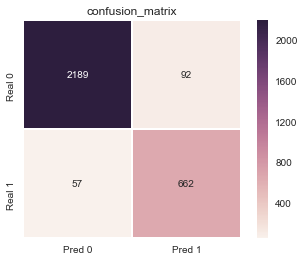

In [39]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, svm_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Logistic Regression

In [43]:
#target = X_train["left"].values

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
logistic_model = LogisticRegression()
logistic_model.fit(features_one, Y_train)

# Print the Models Coefficients
print(logistic_model.coef_)

# Print normal score
print(logistic_model.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(logistic_model, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(logistic_model, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set:
lg_prediction = logistic_model.predict(test_features)

acc = accuracy_score(Y_test, lg_prediction)
precision = precision_score(Y_test,lg_prediction)
recall = recall_score(Y_test, lg_prediction)
f1score = f1_score(Y_test, lg_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)

print("Total number of employees which are likely to leave: ", sum(lg_prediction))



[[ -4.20129294e+00   7.92380828e-01  -3.18488055e-01   4.14417664e-03
    2.74371864e-01  -1.58618925e+00  -1.38834269e+00  -4.36981971e-01
   -5.73054321e-01   3.94004897e-01   4.94171198e-01  -2.32953196e-02
   -4.02172795e-01   1.33317469e-01   3.38177415e-01  -3.46792637e-01
    9.94430420e-02  -3.21787458e-02   8.20965064e-02   2.46570204e-01
    2.19956637e-01]]
0.79664972081
0.794815262719 0.0126425958459
0.825989872804 0.0173763053177
Accuracy of the algorithm:  0.78
Precison of the algorithm:  0.570743405276
Recall of the algorithm:  0.331015299026
F1_Score of the algorithm:  0.419014084507
Total number of employees which are likely to leave:  417


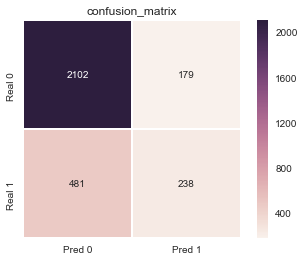

In [44]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, lg_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Decision Tree Classifier

In [45]:
# Using Decision Trees

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features_one, Y_train)


# Print normal score
print(decision_tree.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set:
dt_prediction = decision_tree.predict(test_features)

acc = accuracy_score(Y_test, dt_prediction)
precision = precision_score(Y_test, dt_prediction)
recall = recall_score(Y_test, dt_prediction)
f1score = f1_score(Y_test, dt_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(dt_prediction))

print(decision_tree.feature_importances_)

1.0
0.977081595774 0.00349996168364
0.974744385351 0.0051134856955
Accuracy of the algorithm:  0.980666666667
Precison of the algorithm:  0.948439620081
Recall of the algorithm:  0.972183588317
F1_Score of the algorithm:  0.960164835165
Total number of employees which are likely to leave:  737
[  5.01401284e-01   1.45864682e-01   9.96405440e-02   8.88257522e-02
   1.38400802e-01   6.32506979e-04   2.05366241e-05   1.96716609e-03
   4.63452880e-04   1.75402496e-03   4.19790297e-03   4.99976530e-04
   2.14752288e-03   4.38095573e-04   6.24520644e-04   7.11379263e-04
   6.88462290e-04   8.14639397e-05   1.75392012e-03   5.90385259e-03
   3.98215081e-03]


In [ ]:
"satisfaction_level","last_evaluation", "number_projects","average_monthly_hours",
"time_spent_company",""work_accident"",""promotion_last_5_years"","salary_level",
""salary_high"","salary_medium","salary_low",""department_IT""
"department_RandD",""department_accounting"",""department_hr"",""department_management""
""department_marketing"",""department_product_mng"","department_sales","department_support"
"department_technical"

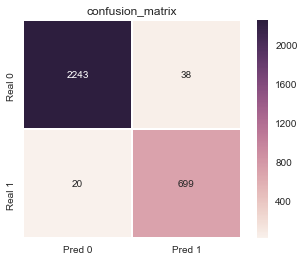

In [46]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, dt_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Random Forest

In [47]:
# Using Random Forest

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
forest = RandomForestClassifier(max_depth = 10, min_samples_split=2, n_estimators = 100, random_state = 1)
forest.fit(features_one, Y_train)


# Print normal score
print(forest.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(forest, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(forest, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set:
forest_prediction = forest.predict(test_features)

acc = accuracy_score(Y_test, forest_prediction)
precision = precision_score(Y_test, forest_prediction)
recall = recall_score(Y_test, forest_prediction)
f1score = f1_score(Y_test, forest_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(dt_prediction))

print(forest.feature_importances_)

0.981998499875
0.977414790103 0.00198773937469
0.991203654119 0.00398342409536
Accuracy of the algorithm:  0.978666666667
Precison of the algorithm:  0.985185185185
Recall of the algorithm:  0.924895688456
F1_Score of the algorithm:  0.954088952654
Total number of employees which are likely to leave:  737
[ 0.30430598  0.12106257  0.22481218  0.13927885  0.16914395  0.0093962
  0.00186139  0.00740756  0.00465852  0.00235147  0.00498585  0.00071429
  0.00102984  0.00104681  0.00058338  0.00138414  0.0005572   0.00061131
  0.00146987  0.00153017  0.0018085 ]


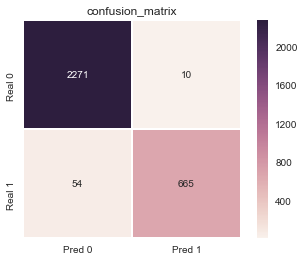

In [48]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, forest_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

# Adaboost Classifier

In [49]:
#Using Adaboost Classifier

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
ada = AdaBoostClassifier(n_estimators = 100,learning_rate=1.5)
ada.fit(features_one, Y_train)


# Print normal score
print(ada.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(ada, features_one, Y_train , cv=kfold , scoring=scoring1)
print(results1)
#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(ada, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","work_accident","promotion_last_5_years","salary_level","salary_high","salary_medium","salary_low","department_IT","department_RandD","department_accounting","department_hr","department_management","department_marketing","department_product_mng","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set:
ada_prediction = ada.predict(test_features)

acc = accuracy_score(Y_test, ada_prediction)
precision = precision_score(Y_test, ada_prediction)
recall = recall_score(Y_test, ada_prediction)
f1score = f1_score(Y_test, ada_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(ada_prediction))

print(ada.feature_importances_)

0.961663471956
[ 0.95083333  0.95583333  0.95916667  0.9625      0.95916667  0.9625
  0.96166667  0.94666667  0.95833333  0.9616347 ]
0.957830136225 0.00504182757254
0.982515808063 0.00320534095695
Accuracy of the algorithm:  0.958333333333
Precison of the algorithm:  0.9125
Recall of the algorithm:  0.913769123783
F1_Score of the algorithm:  0.913134120917
Total number of employees which are likely to leave:  720
[ 0.23  0.24  0.06  0.26  0.08  0.02  0.    0.01  0.01  0.01  0.    0.01
  0.01  0.02  0.    0.01  0.01  0.01  0.01  0.    0.  ]


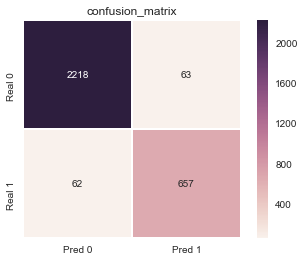

In [50]:
ax = plt.axes()
ax.set_title("confusion_matrix")

df_cm=pd.DataFrame(confusion_matrix(Y_test, ada_prediction), index = ["Real 0", "Real 1"], columns = ["Pred 0", "Pred 1"])
plt.figure(figsize = (6,5))
sns.heatmap(df_cm,annot=True, ax = ax, square=True, fmt="d",linewidths=.5)
plt.show()

Therefore we can canclude that Random Forest,Decision Tree and AdaBoost Algorithms performs well.................

# 1. Feature Selection For  Decision Tree
    Parameters Removed : 
    * promotion_last_5years
    * work_accident
    * salary_high
    * department_accounting
    * department_IT
    * department_hr
    * department_management
    * department_marketing
    * department_product_mng
    
"satisfaction_level","last_evaluation", "number_projects","average_monthly_hours",
"time_spent_company",""work_accident"",""promotion_last_5_years"","salary_level",
""salary_high"","salary_medium","salary_low",""department_IT""
"department_RandD",""department_accounting"",""department_hr"",""department_management""
""department_marketing"",""department_product_mng"","department_sales","department_support"
"department_technical"    

In [51]:
# Using Decision Trees

features_one = X_train[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","salary_level","salary_medium","salary_low","department_RandD","department_sales","department_support","department_technical"]].values
num_folds = 10
num_instances = X_train.shape[0] 
seed=7
scoring1 = 'accuracy'
scoring2 = 'roc_auc'
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
                               
decision_tree = DecisionTreeClassifier()
decision_tree.fit(features_one, Y_train)


# Print normal score
print(decision_tree.score(features_one, Y_train))

results1 = cross_validation.cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring1)

#Print cross validation score
print(results1.mean(), results1.std())

results2 = cross_validation.cross_val_score(decision_tree, features_one, Y_train, cv=kfold,scoring=scoring2)

#Print AUC
print(results2.mean(), results2.std())

# Extract the features from the test set:
test_features = X_test[["satisfaction_level", "last_evaluation", "number_projects", "average_monthly_hours","time_spent_company","salary_level","salary_medium","salary_low","department_RandD","department_sales","department_support","department_technical"]].values
# Make your prediction using the test set:
dt_prediction = decision_tree.predict(test_features)

acc = accuracy_score(Y_test, dt_prediction)
precision = precision_score(Y_test, dt_prediction)
recall = recall_score(Y_test, dt_prediction)
f1score = f1_score(Y_test, dt_prediction)
print("Accuracy of the algorithm: ", acc)
print("Precison of the algorithm: ", precision)
print("Recall of the algorithm: ", recall)
print("F1_Score of the algorithm: ", f1score)
print("Total number of employees which are likely to leave: ", sum(dt_prediction))

print(decision_tree.feature_importances_)

1.0
0.978998401446 0.00366587043918
0.975543381965 0.00479126784377
Accuracy of the algorithm:  0.982
Precison of the algorithm:  0.952380952381
Recall of the algorithm:  0.973574408901
F1_Score of the algorithm:  0.962861072902
Total number of employees which are likely to leave:  735
[ 0.50722465  0.14981121  0.10016186  0.08321349  0.13884844  0.00263231
  0.00278683  0.0030195   0.00210153  0.00313554  0.00262602  0.00443863]
